<a href="https://colab.research.google.com/github/SrijitaThakur/downloadpdf/blob/main/downloadpdf_and_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from unidecode import unidecode

In [17]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Create a directory for saving text files
if not os.path.exists('kinship_articles'):
  os.makedirs('kinship_articles', exist_ok=True)

In [ ]:
def import_csv(csv_file_path):
    return pd.read_csv(csv_file_path)

In [ ]:
# Define a function to extract the last word from the URL
def extract_leaf_node(url):

  """Extracts the leaf node of a URL.

  A leaf node is the last segment of a URL, after the final slash.

  Args:
    url: The URL to extract the leaf node from.

  Returns:
    The leaf node of the URL.
  """

  # Get the last segment of the URL.

  leaf_node = url.split('/')[-1]

  # Return the leaf node.

  return leaf_node

In [19]:
def fetch_url_content(url):
    """
    Fetch the content of a given URL.

    Args:
        url (str): The URL to fetch content from.

    Returns:
        str: The HTML content of the URL.
    """
    response = requests.get(url)
    response.raise_for_status()
    return response.text


def extract_text_from_html(html):
    """
    Extract text from HTML content.

    Args:
        html (str): HTML content.

    Returns:
        str: Extracted text.
    """
    soup = BeautifulSoup(html, 'html.parser')
    text_elements = soup.find_all(['p', 'h1'])
    text_content = [unidecode(element.get_text()) for element in text_elements]
    return '\n'.join(text_content)

In [ ]:
def save_text_to_file(text, file_path):
    """
    Save text to a file.

    Args:
        text (str): Text content to save.
        file_path (str): File path to save the text.
    """
    with open(file_path, "w", encoding="utf-8") as text_file:
        text_file.write(text)

In [20]:
def fetch_kinship_articles(csv_file, save_dir):

    """
    Fetch articles from URLs listed in a CSV file, extract and save the text content,
    and update the DataFrame with local file paths.

    Args:
        csv_file (str): The path to the CSV file containing 'Article URL' and 'Article Title' columns.
        save_dir (str): The directory where the text files will be saved.

    Returns:
        pd.DataFrame: A DataFrame with the updated 'LocalFile' column.
    """

    df = import_csv(csv_file)

    df["Local_File_Link"] = ""
    df["Article_Text"] = ""

    for index, row in df.iterrows():
        input_url = row["Article URL"]
        print(input_url)
        article_title = row["Article Title"]
        output_file = f"{unidecode(article_title).replace(' ', '_')}.txt"

        try:
            html_content = fetch_url_content(input_url)
            text_content = extract_text_from_html(html_content)
            df.at[index, "Article_Text"] = text_content
            save_text_to_file(text_content, os.path.join(save_dir, output_file))
        except requests.exceptions.RequestException as e:
            print(f"Error occurred during the HTTP request for URL {index}: {e}")
        except requests.exceptions.HTTPError as e:
            print(f"HTTP Error for URL {index}: {e}")
        except Exception as e:
            print(f"An unexpected error occurred for URL {index}: {e}")

    df["Local_File_Link"] = [os.path.join(save_dir, f"{article_title.replace(' ', '_')}.txt") for index, article_title in zip(range(len(df)), df["Article Title"])]
    print(f"Text content for all URL in the file, extracted and saved")

    return df


In [21]:
# Example usage:
csv_file = '/content/sample_data/pet-behavior.csv'
save_dir = "/content/kinship_articles"  # Replace with the directory where you want to save the text files

# Call the function to extract and save text files
result_df = fetch_kinship_articles(csv_file, save_dir)

# Convert the dataframe into a CSV file with the Local_File_Link column added
result_df.to_csv("article_for_pets_updated.csv", index=False)

Error occurred during the HTTP request for URL 268: 404 Client Error: Not Found for url: https://www.thewildest.com/cat-behavior/why-does-my-cat-wake-me-up-at-the-crack-of-dawn
Text content for all URL in the file, extracted and saved


In [ ]:
result_df.head()

In [23]:
pet_behaviour_df = fetch_kinship_articles('/content/sample_data/pet-behavior.csv',"/content/kinship_articles")
pet_nutrition_df = fetch_kinship_articles('/content/sample_data/pet-nutrition.csv',"/content/kinship_articles")
pet_health_df = fetch_kinship_articles('/content/sample_data/pets-health.csv',"/content/kinship_articles")
merged_df = pd.concat([pet_behaviour_df, pet_nutrition_df, pet_health_df], ignore_index=True)
merged_df.reset_index(drop=True, inplace=True)

Error occurred during the HTTP request for URL 268: 404 Client Error: Not Found for url: https://www.thewildest.com/cat-behavior/why-does-my-cat-wake-me-up-at-the-crack-of-dawn
Text content for all URL in the file, extracted and saved
Text content for all URL in the file, extracted and saved
Error occurred during the HTTP request for URL 58: 404 Client Error: Not Found for url: https://www.thewildest.com/dog-health/when-diarrhea-turns-dangerous
Error occurred during the HTTP request for URL 60: 404 Client Error: Not Found for url: https://www.thewildest.com/dog-health/the-wildest-pack
Error occurred during the HTTP request for URL 119: 404 Client Error: Not Found for url: https://www.thewildest.com/dog-grooming/jess-rona-seasonal-haircut-for-dogs
Error occurred during the HTTP request for URL 120: 404 Client Error: Not Found for url: https://www.thewildest.com/dog-grooming/how-often-should-you-wash-your-dog
Error occurred during the HTTP request for URL 210: 404 Client Error: Not Found

In [ ]:
merged_df.head()

,Article Title,Species,Main Topic,Secondary Topics,Article URL,Author,Tags,Unnamed: 7,Entry ID,Secondary Topics
0,Does Your Pet Need Therapy?,Cat and Dog,Behavior,"anxiety-separation-anxiety, holistic-vet-care,...",https://thewildest.com/pet-behavior/pet-therapy,Kate Sheofsky,"cat, cat behavior, cat wellness, dog, dog life...",NaN,6PA8RxAE62gPjtUCk2bZZf,NaN
1,Your Pet's Behavioral Issues Might Be All in T...,Cat and Dog,Behavior,"behavioral-issues, behavior-body-language, food",https://thewildest.com/pet-behavior/dog-microb...,Kate Sheofsky,"dog behavior, cat behavior, cat, dog",NaN,4ghtYApaiXMwUJvEtgJoTM,NaN
2,Why Are Cats More Flexible Than Dogs?,Cat and Dog,Behavior,behavior-body-language,https://thewildest.com/pet-behavior/why-are-ca...,"Sarah Wooten, DVM","cat, dog, cat behavior, dog behavior",NaN,bark-article-7608,NaN
3,How Daylight Saving Time Affects Pets,Cat and Dog,Behavior,"basic-obedience-training, life-with-pets",https://thewildest.com/pet-behavior/pets-and-t...,"Karen B. London, PhD","pet lifestyle, dog lifestyle, dog behavior, do...",NaN,5s455JOyU3nkbSvkz0qkNp,NaN
4,What is Separation Anxiety in Dogs?,Dog,Behavior,anxiety-separation-anxiety,https://thewildest.com/dog-behavior/separation...,Kate Sheofsky,"dog, puppy, dog behavior, new dog, dog health,...",NaN,4q7bzwX2U5NFfhUDWsrHaH,NaN


In [24]:
merged_df[merged_df['Tags'].isnull()]

,Article Title,Species,Main Topic,Secondary Topics,Article URL,Author,Tags,Unnamed: 7,Entry ID,Local_File_Link,Article_Text,Secondary Topics
493,New Study Finds You‚Äôre Probably Not Washing ...,Dog,Health,NaN,https://thewildest.com/dog-health/bacteria-in-...,Jodi Helmer,NaN,NaN,7pxhC5U4gLiHoJGDf0ZucM,/content/kinship_articles/New_Study_Finds_You‚...,Youare Probably Not Washing Your Dogas Bowl En...,"safety, food"


In [25]:
# prompt: update the record in result_df_big where Tags is null to "dog, health"

merged_df['Tags'].fillna('dog, health', inplace=True)

In [26]:
merged_df.drop(columns=['Unnamed: 7'], inplace=True)

In [27]:
merged_df['Secondary Topics'].loc[493]

'safety, food'

In [43]:
merged_df['Secondary Topics '].loc[300]

nan

In [32]:
# prompt: if value in column 'Secondary Topics' is null replace it with value in column 'Secondary Topics '

merged_df['Secondary Topics'].fillna(merged_df['Secondary Topics '], inplace=True)

In [34]:
merged_df[merged_df['Secondary Topics'].isnull()]

,Article Title,Species,Main Topic,Secondary Topics,Article URL,Author,Tags,Entry ID,Local_File_Link,Article_Text,Secondary Topics
49,Why Won‚Äôt Your Dog Listen to You?,Dog,Behavior,NaN,https://thewildest.com/dog-behavior/my-dog-doe...,"Nicole Ellis, CPDT-KA","dog, dog behavior, dog training",2PTpBCxZxcTZwt4xvdnAoF,/content/kinship_articles/Why_Won‚Äôt_Your_Dog...,"Hey, Why Is Your Dog Ignoring You?\nSix tips a...",NaN
285,Is It OK For Your Cat to Play With Their Food?,Cat,Behavior,NaN,https://thewildest.com/cat-behavior/should-cat...,"Karen B. London, PhD","cat, cat behavior, cat food, kitten",258h4R2uFVAFDCrpVuwGrE,/content/kinship_articles/Is_It_OK_For_Your_Ca...,Is It Full Goblin-Mode Behavior for Your Cat t...,NaN
379,Can Dogs Eat Pineapple? How to Safely Give Dog...,Dog,Nutrition,NaN,https://thewildest.com/dog-nutrition/can-dogs-...,Daniela Lopez,"dog, dog food, dog nutrition, can my dog eat t...",6KXbLZ6wtgHJX4rjl0BE1Q,/content/kinship_articles/Can_Dogs_Eat_Pineapp...,Can Dogs Eat Pineapple?\nPineapple is a health...,NaN
597,Hyperadrenocorticism or Cushing‚Äôs Disease in...,Dog,Health,NaN,https://thewildest.com/dog-health/cushings-dis...,"Dr. Shea Cox, DVM, CVPP, CHPV","dog, dog behavior, dog food, dog health",4x6cgnFiUggagvisnHLaos,/content/kinship_articles/Hyperadrenocorticism...,Does My Dog Have Cushingas Disease?\nHyperadre...,NaN


In [35]:
# Create a custom function to fill NaN values
def fill_secondary_topic(row):
    if pd.isna(row['Secondary Topics']):
        return f"{row['Species']},{row['Main Topic']}"
    return row['Secondary Topics']

# Apply the custom function to fill NaN values in the "secondary_topic" column
merged_df['Secondary Topics'] = merged_df.apply(fill_secondary_topic, axis=1)

In [44]:
# Create a custom function to fill NaN values
def fill_secondary_topic_space(row):
    if pd.isna(row['Secondary Topics ']):
        return row['Secondary Topics']
    return row['Secondary Topics ']

# Apply the custom function to fill NaN values in the "secondary_topic" column
merged_df['Secondary Topics '] = merged_df.apply(fill_secondary_topic_space, axis=1)

In [38]:
merged_df['Secondary Topics'].fillna(merged_df['Secondary Topics '], inplace=True)

In [45]:
merged_df[merged_df['Secondary Topics '].isnull()]

,Article Title,Species,Main Topic,Secondary Topics,Article URL,Author,Tags,Entry ID,Local_File_Link,Article_Text,Secondary Topics


In [46]:
merged_df.drop(columns=['Secondary Topics '], inplace=True)

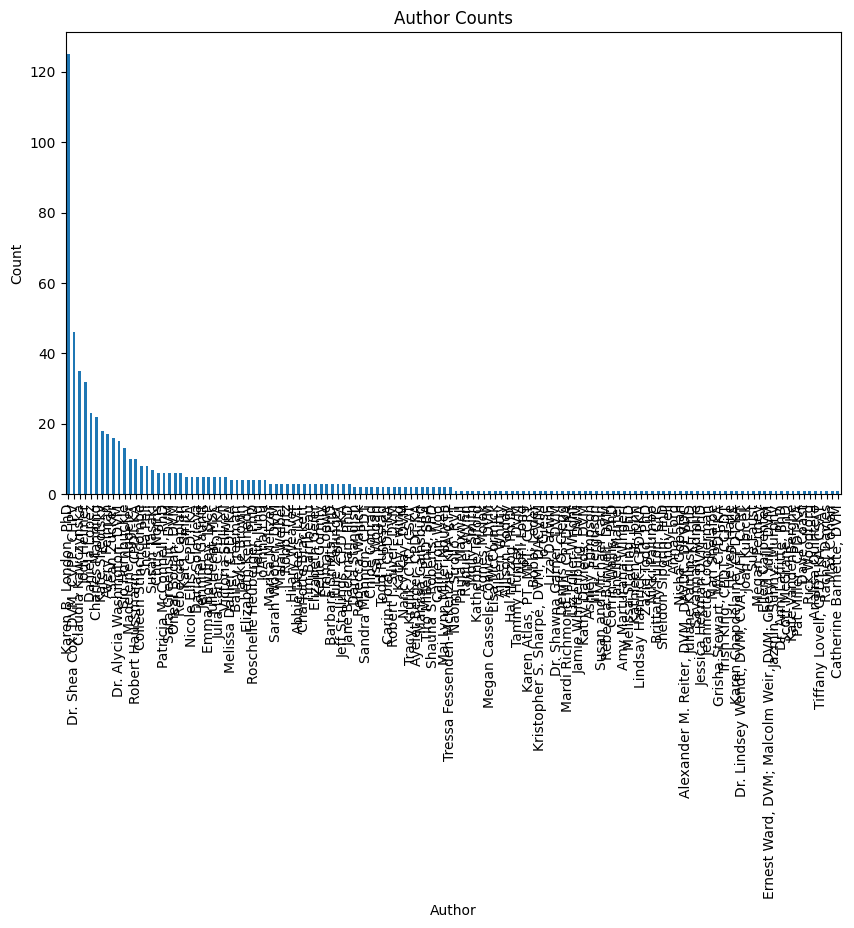

In [47]:
def plot_author_counts(result_df, title='Author Counts', xlabel='Author', max_count=0):
    """
    Create and display a bar chart showing the counts of each author in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        title (str): The title of the chart. Default value is 'Author Counts'.
        xlabel (str): The label for the x-axis. Default value is 'Author'.
        max_count (int): The maximum number of authors to plot. Default value is zero, no limit.

    Returns:
        None
    """
    author_counts = result_df['Author'].value_counts()
    if (max_count > 0):
        author_counts = author_counts[:max_count]

    plt.figure(figsize=(10, 6))
    author_counts.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()
    return author_counts

# Call the function to plot the author counts
val = plot_author_counts(merged_df)


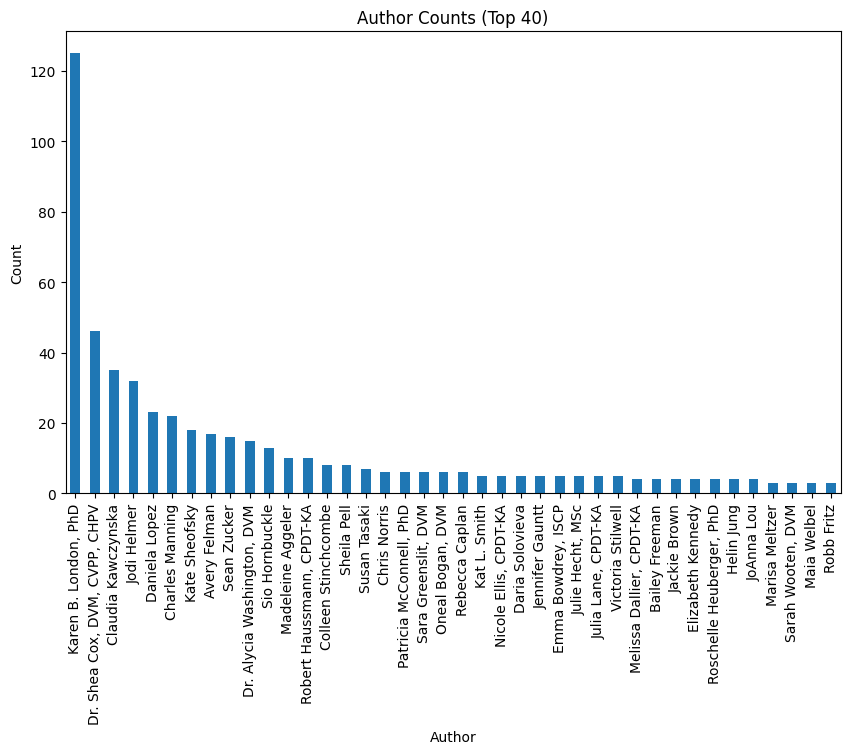

In [49]:
# Call the function to plot the author counts
val = plot_author_counts(merged_df, title='Author Counts (Top 40)', xlabel='Author', max_count=40)

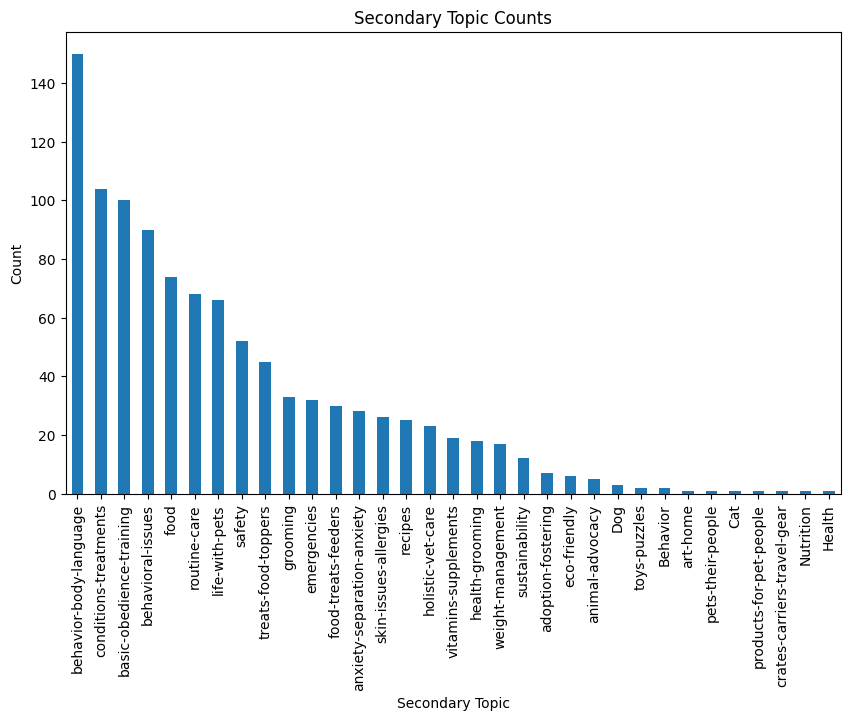

In [50]:
def plot_secondary_topics(result_df):
    """
    Create and display a bar chart showing the counts of each secondary topic in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.

    Returns:
        None
    """
    # Split the comma-separated values in the 'Secondary Topics' column
    topics_split = result_df['Secondary Topics'].str.split(',').explode().str.strip()

    # Count the occurrences of each secondary topic
    topic_counts = topics_split.value_counts()

    plt.figure(figsize=(10, 6))
    topic_counts.plot(kind='bar')
    plt.title('Secondary Topic Counts')
    plt.xlabel('Secondary Topic')
    plt.ylabel('Count')
    plt.show()

# Call the function to plot the secondary topic counts
plot_secondary_topics(merged_df)

In [62]:
merged_df['Tags'] = merged_df['Tags'].str.replace('why, cat?!', 'why cat?!', regex=False)

In [71]:
merged_df.loc[278]

Article Title                              Why Cats Knock Things Over
Species                                                           Cat
Main Topic                                                   Behavior
Article URL         https://thewildest.com/cat-behavior/why-do-cat...
Author                                                Charles Manning
Tags                             why cat?!, kitten, cat behavior, cat
Entry ID                                       5GO3mFl4NIlnFqX9phvX0d
Local_File_Link     /content/kinship_articles/Why_Cats_Knock_Thing...
Article_Text        Why Do Cats Knock Stuff Over?\nYour brand new ...
Secondary Topics            behavior-body-language, behavioral-issues
Name: 278, dtype: object

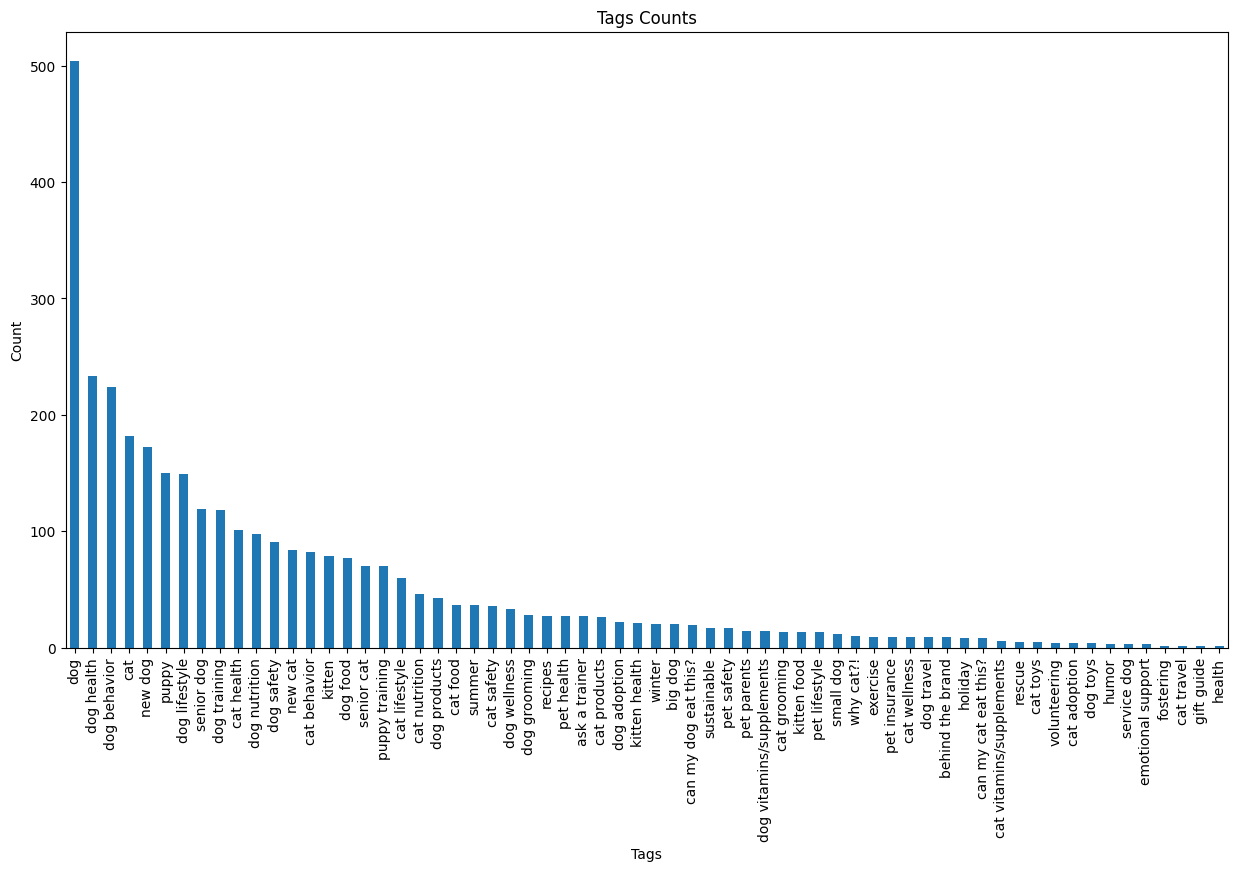

In [72]:
def plot_tags(result_df):
    """
    Create and display a bar chart showing the counts of each secondary topic in the DataFrame.

    Args:
        result_df (pd.DataFrame): The DataFrame containing the data.
        specific_value (str): The specific value to preserve without splitting.

    Returns:
        None
    """

    # Split the comma-separated values in the 'Tags' column
    tags_split = result_df['Tags'].str.split(', ').explode().str.strip()

    # Count the occurrences of each secondary topic
    tag_counts = tags_split.value_counts()

    plt.figure(figsize=(15, 8))
    tag_counts.plot(kind='bar')
    plt.title('Tags Counts')
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.show()

# Call the function to plot the secondary topic counts, preserving "why, cat?!"
plot_tags(merged_df)


In [54]:
merged_df.to_csv("merged_articles.csv")

# **Description:**

This Python script is designed to extract and save the content of web pages as plain text files while removing unwanted elements and special characters.

---

The script performs the following steps:

**Setup:**

Create a directory for saving text files, specified as text_dir, and ensure that it exists.
Read a CSV file containing a list of URLs (e.g., 'article_for_pets.csv') and store the data in a Pandas DataFrame.

**Data Processing:**

Define a function to extract the last word from a URL, which will be used as the filename.
Define a function to download and save web pages as plain text.
Download the web page content using the requests library and parse it with BeautifulSoup.

**Content Extraction:**

Extract text content from specific HTML tags such as paragraphs and h1 and join them using newline characters.

Remove special characters and retain alphanumeric characters, common punctuation, spaces, and newline characters using regular expressions.

**File Saving:**

Save the plain text content to a text file with a filename derived from the last word in the URL.

Create a new column in the DataFrame called "article_text" and store the article text in this column.

**Processing Loop:**

Loop through the DataFrame, processing each URL one by one.
Print the URL being processed.
DataFrame Update:

Update the DataFrame with the local file name of the saved text file for each URL.

**Graph Plotting**

Used matplotlib for plotting graph on Author count
and also secondary topics

**Data Export:**

Save the updated DataFrame to a CSV file for future reference.
The resulting plain text files are saved in the specified text_dir directory. This script enables you to convert web page content into clean and structured plain text format for further analysis or archiving, while excluding navigation elements, images, ads, and special characters.


In [ ]:
!pip install -r sample_data/requirements.txt